In [17]:
# 범주형 - 범주형 구조에 대한 데이터 분석
# 사고유형과 가해자상해정도
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder


print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('seaborn version:', sns.__version__)
print(f"matplotlib: mpl {plt.matplotlib.__version__}")
print('sklearn version:', sklearn.__version__)

font_path = "c:/Windows/Fonts/malgun.ttf"
font_prop = mpl.font_manager.FontProperties(fname=font_path)
mpl.rcParams['font.family'] = font_prop.get_name()
mpl.rcParams['axes.unicode_minus'] = False

numpy version: 2.1.0
pandas version: 2.2.2
seaborn version: 0.13.2
matplotlib: mpl 3.9.2
sklearn version: 1.5.1


In [18]:
accident = pd.read_csv('not_cate_data.csv')

In [19]:
accident.head()

,사고일시,요일,사고유형,노면상태,기상상태,도로형태,가해운전자 차종,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사고날짜,사고시간
0,2014-01-01 00:00:00,수요일,차대차,건조,맑음,단일로,승용,31,상해없음,승용,남,65.0,부상신고,2014-01-01,00:00:00
1,2014-01-01 01:00:00,수요일,차대차,기타,맑음,단일로,승용,32,상해없음,승용,남,54.0,중상,2014-01-01,01:00:00
2,2014-01-01 02:00:00,수요일,차대차,건조,맑음,단일로,승용,26,상해없음,승용,여,26.0,부상신고,2014-01-01,02:00:00
3,2014-01-01 02:00:00,수요일,차대차,건조,맑음,단일로,승용,29,상해없음,승용,남,25.0,경상,2014-01-01,02:00:00
4,2014-01-01 02:00:00,수요일,차대차,건조,맑음,교차로,승용,42,상해없음,승용,남,37.0,경상,2014-01-01,02:00:00


In [20]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 데이터프레임 생성 (예시 데이터)
df = accident[['가해운전자 상해정도', '사고유형']]

In [21]:
df.rename(columns={'가해운전자 상해정도': '가해운전자_상해정도'}, inplace=True)

C:\Users\medici\AppData\Local\Temp\ipykernel_37948\1584831683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'가해운전자 상해정도': '가해운전자_상해정도'}, inplace=True)


In [22]:
import pandas as pd
import scipy.stats as stats

# 예시 데이터
# 교차 테이블 생성
contingency_table = pd.crosstab(df['사고유형'], df['가해운전자_상해정도'])

# 카이제곱 독립성 검정
chi2, p, _, _ = stats.chi2_contingency(contingency_table)

print(f'Chi2 Stat: {chi2}')
print(f'p-value: {p}')


Chi2 Stat: 7840.2442054651465
p-value: 0.0


In [23]:
from scipy.stats import chi2_contingency
def cramers_v(chi2, n):
    return np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

chi2, _, _, _ = chi2_contingency(contingency_table)

# Cramér's V 계산
n = contingency_table.sum().sum()
cramers_v_value = cramers_v(chi2, n)

print(f'Cramér\'s V: {cramers_v_value}')

Cramér's V: 0.40375633129734667


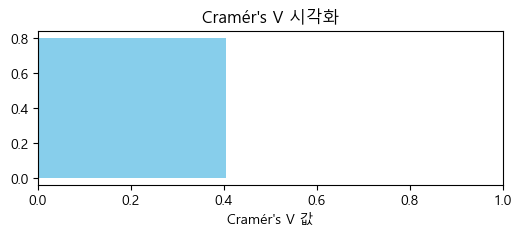

In [24]:
cramers_v= 0.40375633129734667
plt.figure(figsize=(6, 2))
plt.barh([cramers_v], [cramers_v_value], color='skyblue')
plt.xlabel('Cramér\'s V 값')
plt.title('Cramér\'s V 시각화')
plt.xlim(0, 1)  # Cramér's V는 0에서 1 사이의 값
plt.show()

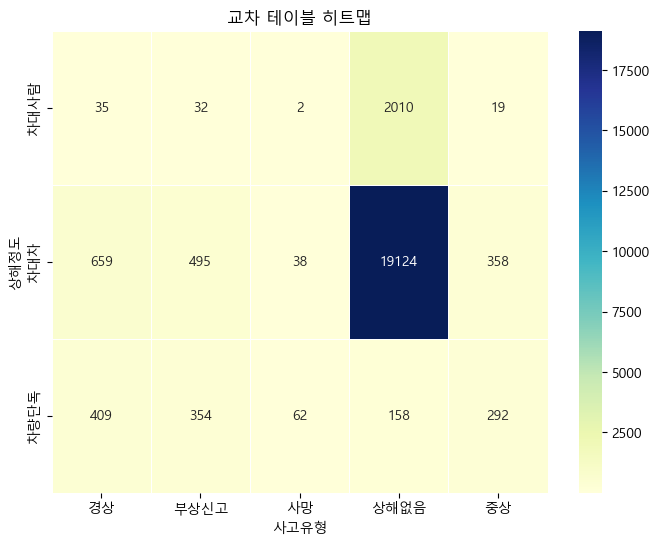

In [25]:
#카이제곱에 대한 시각화

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='d', linewidths=.5)
plt.title('교차 테이블 히트맵')
plt.xlabel('사고유형')
plt.ylabel('상해정도')
plt.show()